In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import json

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("preprocessed_train.csv", encoding='euc-kr')

In [3]:
train_df.head()

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,1,144,12.298611,1771,5.356616,0,0,0,1,...,10,4,10,9,4,0,1,0,0,0
1,2,1,804,9.580846,7703,6.063542,0,0,0,6,...,43,121,84,78,47,36,40,45,27,36
2,3,0,2205,12.736054,28083,6.107050,9,0,0,6,...,326,268,239,286,199,148,154,37,48,36
3,4,0,2602,10.288240,26770,5.373013,8,0,0,1,...,336,230,206,245,76,0,26,702,1,5
4,5,1,8980,23.252339,208806,5.775223,0,28,16,3,...,731,882,1171,1010,322,64,327,84,75,244


In [4]:
train_df = train_df.drop(columns=['분석데이터'], axis=1)

In [5]:
x_train = train_df[:8000]
y_train = x_train['label']

x_test = train_df[8000:]
y_test = x_test['label']


x_train = x_train.drop(columns=['label'], axis=1)
x_test = x_test.drop(columns=['label'], axis=1)

In [6]:
x_train

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,144,12.298611,1771,5.356616,0,0,0,1,2399,572,...,10,4,10,9,4,0,1,0,0,0
1,804,9.580846,7703,6.063542,0,0,0,6,183376,8477,...,43,121,84,78,47,36,40,45,27,36
2,2205,12.736054,28083,6.107050,9,0,0,6,1178,28,...,326,268,239,286,199,148,154,37,48,36
3,2602,10.288240,26770,5.373013,8,0,0,1,56851,2625,...,336,230,206,245,76,0,26,702,1,5
4,8980,23.252339,208806,5.775223,0,28,16,3,124274,5778,...,731,882,1171,1010,322,64,327,84,75,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,8736,161.916094,1414499,5.045352,0,9,0,11,20409,472,...,20733,19933,27071,31742,75164,67,194,101,76,66
7996,6592,5.987561,39470,6.573862,0,0,0,21,183376,8477,...,405,406,385,436,340,366,343,393,416,377
7997,5255,6.607041,34720,6.503973,0,7,0,15,147733,8023,...,231,255,334,395,185,235,241,180,181,193
7998,11618,5.882940,68348,6.577309,1,5,0,41,96507,7356,...,667,676,685,746,663,624,634,602,625,598


In [7]:
x_test

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
8000,3522,14.883589,52420,5.729609,103,0,0,6,462397,103815,...,320,326,272,334,70,23,123,38,43,294
8001,846,14.718676,12452,5.646406,0,0,0,2,20251821,3053,...,96,39,102,135,26,13,49,9,11,16
8002,16716,5.786552,96728,6.537585,1,0,0,37,6454,329,...,1177,829,1451,688,1387,822,890,648,949,705
8003,3013,26.163956,78832,5.457340,1,0,0,6,902116,72960,...,712,470,580,489,159,13,23,12,16,11
8004,658,14.518237,9553,5.170602,0,0,0,2,42438,23885,...,96,16,56,229,10,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018,13.938057,28127,5.940442,0,70,0,11,255044,17531,...,246,186,206,235,88,33,81,58,61,72
9996,1105,16.437104,18163,5.766962,0,11,0,3,181296,5127,...,199,57,134,123,20,25,28,25,41,13
9997,4,58.500000,234,3.811827,0,0,0,1,68736,2344,...,0,0,0,0,0,0,0,0,0,0
9998,3312,24.939312,82599,5.834730,0,39,0,8,90648,1338,...,438,985,806,851,113,123,181,100,75,86


In [8]:
y_train

0       1
1       1
2       0
3       0
4       1
       ..
7995    0
7996    1
7997    1
7998    1
7999    0
Name: label, Length: 8000, dtype: int64

In [9]:
y_test

8000    1
8001    1
8002    0
8003    0
8004    1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: label, Length: 2000, dtype: int64

## 데이터 정형화

In [10]:
maxCol = x_train.max()
col = x_train.columns
for i in range(len(maxCol)):
    x_train[col[i]] = x_train[col[i]] / maxCol[i]

In [11]:
x_train

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,0.000380,0.000226,0.000081,0.813473,0.000000,0.000000,0.000000,0.000190,0.000075,0.000537,...,0.000029,0.000012,0.000029,0.000027,0.000012,0.000000,0.000027,0.000000,0.000000,0.000000
1,0.002123,0.000176,0.000354,0.920829,0.000000,0.000000,0.000000,0.001139,0.005726,0.007960,...,0.000127,0.000355,0.000247,0.000230,0.000138,0.000424,0.001064,0.000874,0.002036,0.002412
2,0.005823,0.000234,0.001289,0.927437,0.000909,0.000000,0.000000,0.001139,0.000037,0.000026,...,0.000960,0.000787,0.000702,0.000842,0.000585,0.001745,0.004096,0.000719,0.003620,0.002412
3,0.006872,0.000189,0.001229,0.815963,0.000808,0.000000,0.000000,0.000190,0.001775,0.002465,...,0.000990,0.000675,0.000605,0.000722,0.000223,0.000000,0.000691,0.013636,0.000075,0.000335
4,0.023715,0.000427,0.009582,0.877044,0.000000,0.012607,0.202532,0.000570,0.003881,0.005426,...,0.002153,0.002589,0.003439,0.002974,0.000947,0.000754,0.008696,0.001632,0.005656,0.016345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.023071,0.002972,0.064914,0.766204,0.000000,0.004052,0.000000,0.002089,0.000637,0.000443,...,0.061059,0.058505,0.079501,0.093481,0.221040,0.000790,0.005159,0.001962,0.005732,0.004421
7996,0.017409,0.000110,0.001811,0.998328,0.000000,0.000000,0.000000,0.003988,0.005726,0.007960,...,0.001193,0.001192,0.001131,0.001284,0.001000,0.004314,0.009122,0.007634,0.031373,0.025255
7997,0.013878,0.000121,0.001593,0.987715,0.000000,0.003152,0.000000,0.002848,0.004613,0.007534,...,0.000680,0.000748,0.000981,0.001163,0.000544,0.002770,0.006409,0.003497,0.013650,0.012929
7998,0.030682,0.000108,0.003137,0.998852,0.000101,0.002251,0.000000,0.007786,0.003014,0.006908,...,0.001964,0.001984,0.002012,0.002197,0.001950,0.007356,0.016861,0.011694,0.047134,0.040059


In [12]:
x = x_train.to_numpy()

x1 = np.zeros((8000,22,28))
x2 = np.zeros((8000,22,28,1))

for i in range(len(x_train)):
    x1[i] = x[i].reshape((22,28))
    for j in range(22):
        for k in range(28):
            x2[i][j][k][0] = x1[i][j][k]
            
x_train = x2

In [13]:
x1.shape

(8000, 22, 28)

In [14]:
y_train = y_train.to_numpy()

In [15]:
maxCol2 = x_test.max()
col2 = x_test.columns
for i in range(len(maxCol2)):
    x_test[col[i]] = x_test[col[i]] / maxCol2[i]

In [16]:
x_test

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
8000,0.008386,0.005284,0.022213,0.870111,0.229399,0.000000,0.0,0.004144,0.018050,0.467130,...,0.012920,0.002843,0.010048,0.010210,0.000931,0.000934,0.005034,0.000710,0.001758,0.011996
8001,0.002014,0.005225,0.005276,0.857475,0.000000,0.000000,0.0,0.001381,0.790545,0.013737,...,0.003876,0.000340,0.003768,0.004127,0.000346,0.000528,0.002005,0.000168,0.000450,0.000653
8002,0.039802,0.002054,0.040988,0.992812,0.002227,0.000000,0.0,0.025552,0.000252,0.001480,...,0.047523,0.007229,0.053600,0.021031,0.018453,0.033393,0.036425,0.012104,0.038793,0.028766
8003,0.007174,0.009288,0.033404,0.828764,0.002227,0.000000,0.0,0.004144,0.035215,0.328294,...,0.028748,0.004098,0.021425,0.014948,0.002115,0.000528,0.000941,0.000224,0.000654,0.000449
8004,0.001567,0.005154,0.004048,0.785219,0.000000,0.000000,0.0,0.001381,0.001657,0.107474,...,0.003876,0.000140,0.002069,0.007000,0.000133,0.000041,0.000000,0.000019,0.000000,0.000041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.004805,0.004948,0.011919,0.902128,0.000000,0.163551,0.0,0.007597,0.009956,0.078883,...,0.009933,0.001622,0.007610,0.007183,0.001171,0.001341,0.003315,0.001083,0.002494,0.002938
9996,0.002631,0.005835,0.007696,0.875783,0.000000,0.025701,0.0,0.002072,0.007077,0.023070,...,0.008035,0.000497,0.004950,0.003760,0.000266,0.001016,0.001146,0.000467,0.001676,0.000530
9997,0.000010,0.020767,0.000099,0.578872,0.000000,0.000000,0.0,0.000691,0.002683,0.010547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9998,0.007886,0.008853,0.035001,0.886075,0.000000,0.091121,0.0,0.005525,0.003539,0.006021,...,0.017685,0.008589,0.029774,0.026013,0.001503,0.004997,0.007408,0.001868,0.003066,0.003509


In [17]:
xt = x_test.to_numpy()

xt1 = np.zeros((2000,22,28))
xt2 = np.zeros((2000,22,28,1))

for i in range(len(x_test)):
    xt1[i] = xt[i].reshape((22,28))
    for j in range(22):
        for k in range(28):
            xt2[i][j][k][0] = xt1[i][j][k]
            
x_test = xt2

In [18]:
y_test = y_test.to_numpy()

In [19]:
x_test.shape

(2000, 22, 28, 1)

In [20]:
# 합성곱 층 만들기

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(22, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [21]:
# 마지막에 Dense 층 추가하기
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 11, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [23]:
# 모델 컴파일과 훈련하기
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
250/250 [==============================] - 2s 3ms/step - loss: 0.6104 - accuracy: 0.6522
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.5304 - accuracy: 0.7265
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4917 - accuracy: 0.7536
Epoch 4/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4479 - accuracy: 0.7793
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4218 - accuracy: 0.7974


In [24]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

63/63 - 0s - loss: 0.5623 - accuracy: 0.7540
0.7540000081062317


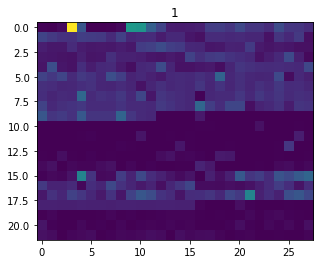

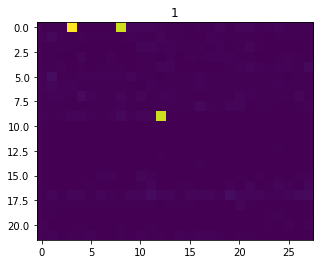

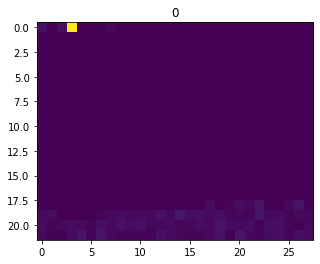

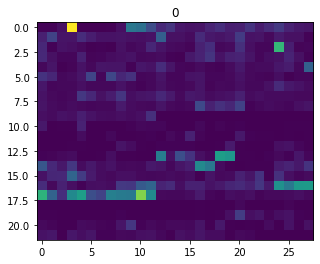

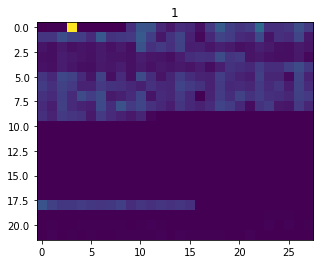

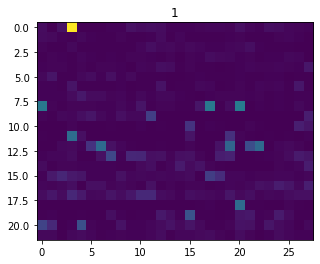

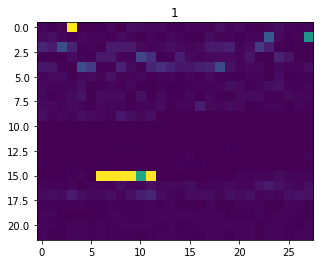

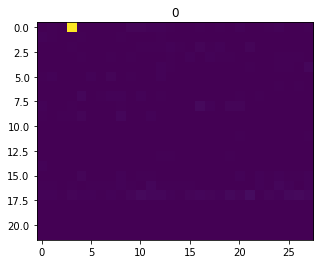

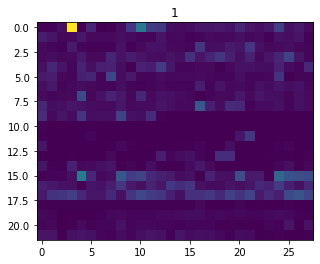

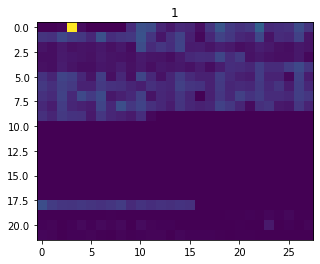

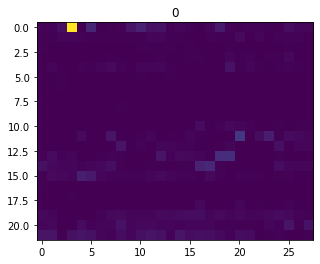

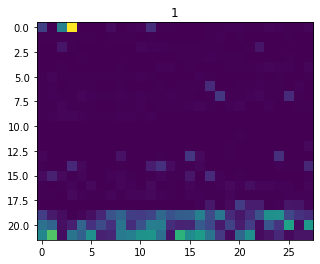

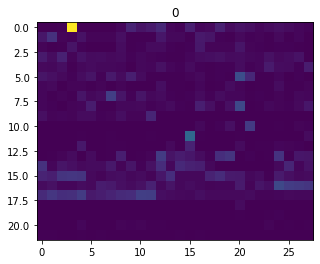

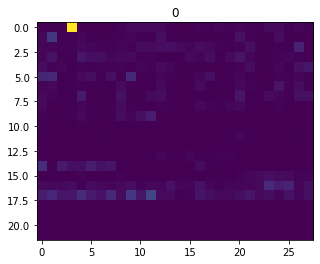

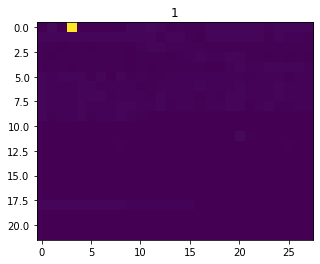

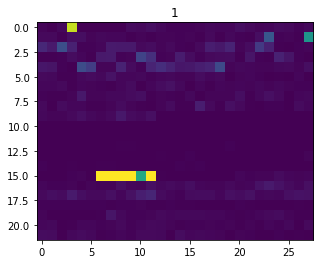

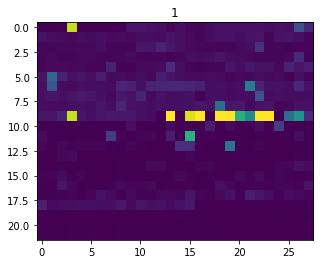

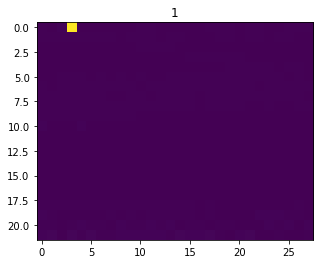

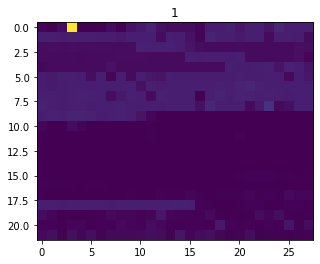

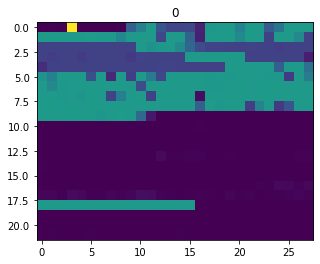

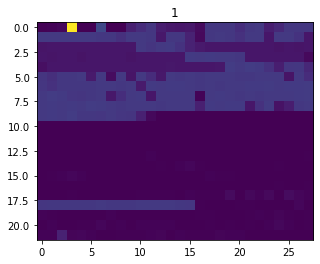

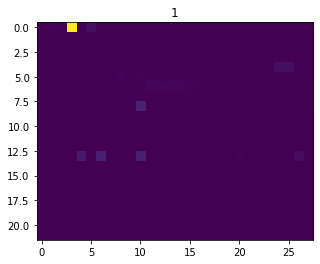

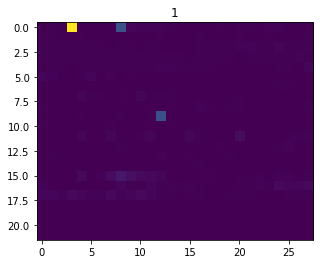

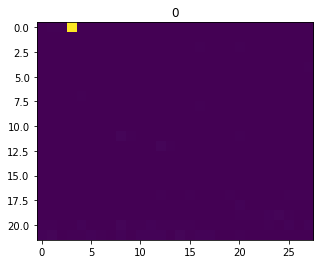

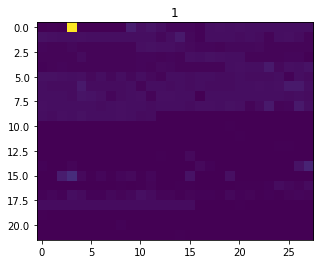

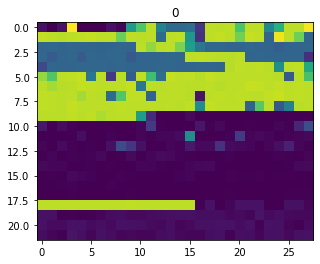

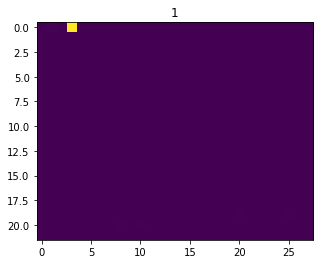

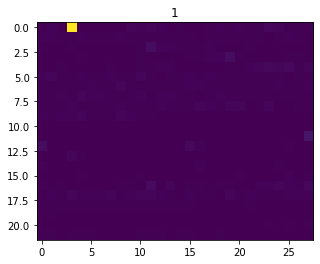

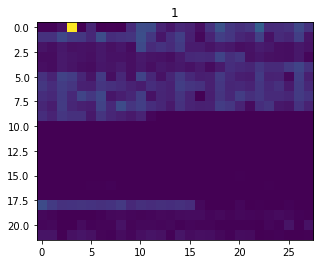

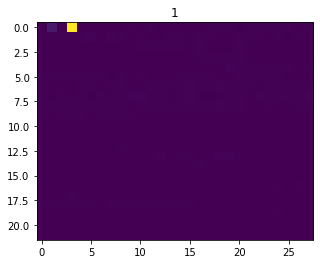

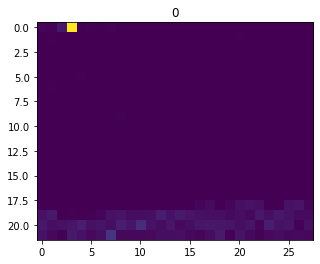

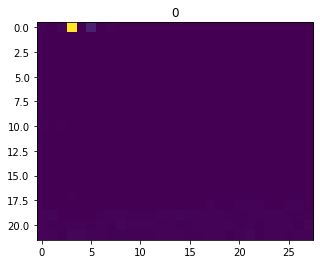

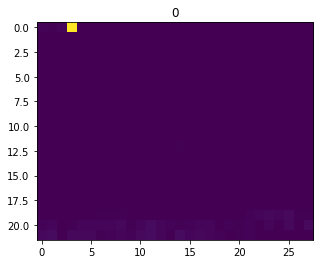

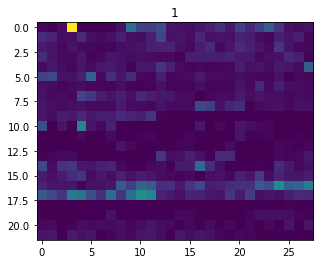

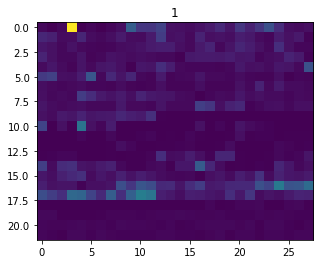

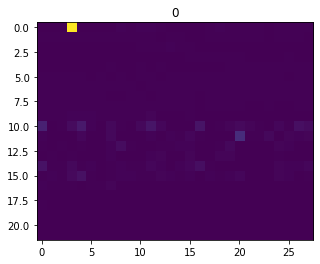

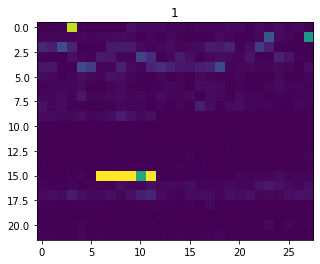

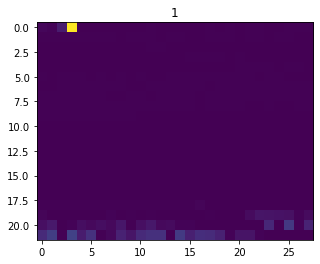

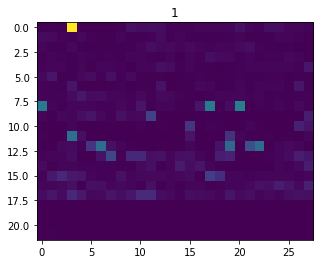

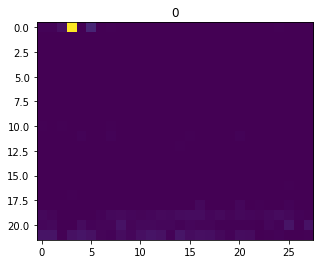

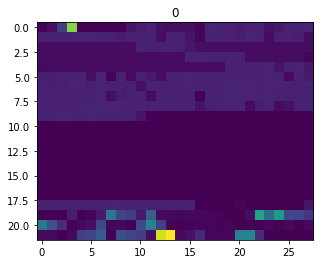

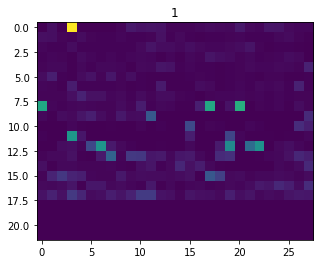

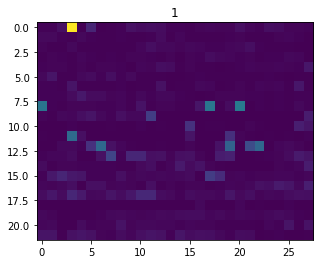

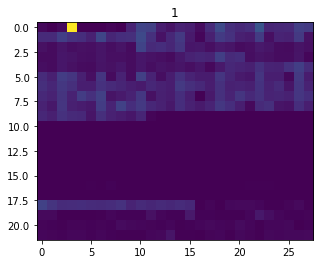

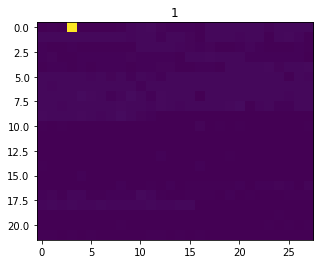

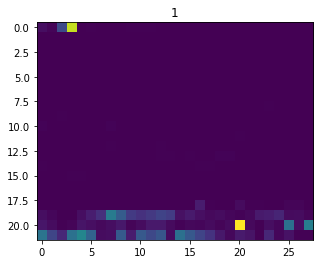

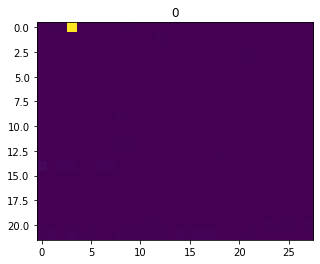

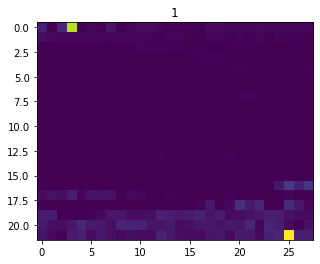

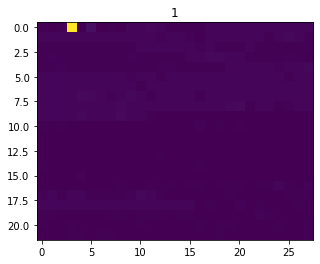

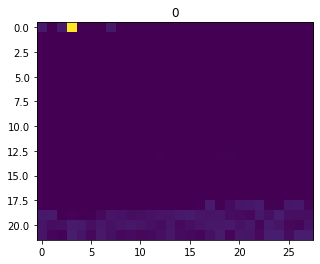

In [25]:
from matplotlib import pyplot as plt

for i in range(50):
    plt.imshow(x_test[i], interpolation='nearest')
    plt.title(str(y_test[i]))
    plt.show()